In [1]:
import warnings
warnings.filterwarnings("ignore")

# Exploratory Data Analysis (EDA)

In [ ]:
# ============= Show Sample from data ===============

import pandas as pd
file_path = "/kaggle/input/3w-dataset/2.0.0/9/SIMULATED_00060.parquet"

df = pd.read_parquet(file_path)
df.head(10)

,ABER-CKGL,ABER-CKP,ESTADO-DHSV,ESTADO-M1,ESTADO-M2,ESTADO-PXO,ESTADO-SDV-GL,ESTADO-SDV-P,ESTADO-W1,ESTADO-W2,...,PT-P,P-TPT,QBS,QGL,T-JUS-CKP,T-MON-CKP,T-PDG,T-TPT,class,state
timestamp,,,,,,,,,,,,,,,,,,,,,
2018-09-29 19:06:47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,9.448843e+06,NaN,2.662205,78.817070,NaN,NaN,93.733440,0,0
2018-09-29 19:06:48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,9.448844e+06,NaN,2.662206,78.817062,NaN,NaN,93.733432,0,0
2018-09-29 19:06:49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,9.448842e+06,NaN,2.662207,78.817060,NaN,NaN,93.733422,0,0
2018-09-29 19:06:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,9.448854e+06,NaN,2.662207,78.817060,NaN,NaN,93.733420,0,0
2018-09-29 19:06:51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,9.448853e+06,NaN,2.662208,78.817052,NaN,NaN,93.733412,0,0
2018-09-29 19:06:52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,9.448854e+06,NaN,2.662209,78.817050,NaN,NaN,93.733402,0,0
2018-09-29 19:06:53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,9.448845e+06,NaN,2.662209,78.817050,NaN,NaN,93.733385,0,0
2018-09-29 19:06:54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,9.448844e+06,NaN,2.662210,78.817042,NaN,NaN,93.733380,0,0
2018-09-29 19:06:55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,9.448850e+06,NaN,2.662211,78.817040,NaN,NaN,93.733372,0,0


In [ ]:
# ===============This code scans parquet files in multiple folders and creates a report about rows, columns, and null values in each file=================

import pandas as pd
import os
import glob

base_path = '/kaggle/input/3w-dataset/2.0.0'

full_report = []

print("Starting global data scan...")

for folder_num in range(10):
    folder_path = os.path.join(base_path, str(folder_num))
    if not os.path.exists(folder_path):
        continue
        
    print(f"Scanning Folder: {folder_num}...")
    
    files = glob.glob(os.path.join(folder_path, "*.parquet"))
    
    for file_path in files:
        file_name = os.path.basename(file_path)
        
        try:
            df = pd.read_parquet(file_path)
            total_rows = len(df)
            null_counts = df.isnull().sum()
            all_null_cols = null_counts[null_counts == total_rows].index.tolist()
            partial_null_cols = null_counts[(null_counts > 0) & (null_counts < total_rows)].index.tolist()
            
            full_report.append({
                'folder': folder_num,
                'file_name': file_name,
                'rows': total_rows,
                'cols': len(df.columns),
                'all_null_count': len(all_null_cols),
                'all_null_columns': all_null_cols,
                'partial_null_columns': partial_null_cols
            })
            
        except Exception as e:
            print(f"Error reading {file_name}: {e}")

report_df = pd.DataFrame(full_report)

print("\n--- Global Scan Finished ---")
print(f"Total files scanned: {len(report_df)}")

Starting global data scan...
Scanning Folder: 0...
Scanning Folder: 1...
Scanning Folder: 2...
Scanning Folder: 3...
Scanning Folder: 4...
Scanning Folder: 5...
Scanning Folder: 6...
Scanning Folder: 7...
Scanning Folder: 8...
Scanning Folder: 9...

--- Global Scan Finished ---
Total files scanned: 2228


In [ ]:
# =================This code finds columns that are always empty across files and checks if there are very small datasets based on row count======================

from collections import Counter
all_empty_cols = [col for sublist in report_df['all_null_columns'] for col in sublist]
common_empty = Counter(all_empty_cols).most_common()

print("\nMost common empty columns (Always Null):")
for col, count in common_empty:
    print(f"{col}: Found empty in {count} files")

small_files = report_df[report_df['rows'] < 100]
print(f"\nFiles with less than 100 rows: {len(small_files)}")


Most common empty columns (Always Null):
P-JUS-BS: Found empty in 2228 files
P-MON-SDV-P: Found empty in 2228 files
PT-P: Found empty in 2228 files
QBS: Found empty in 2228 files
P-MON-CKGL: Found empty in 2226 files
ABER-CKGL: Found empty in 1942 files
ABER-CKP: Found empty in 1929 files
ESTADO-DHSV: Found empty in 1758 files
ESTADO-SDV-GL: Found empty in 1748 files
ESTADO-M1: Found empty in 1727 files
ESTADO-M2: Found empty in 1724 files
ESTADO-PXO: Found empty in 1696 files
ESTADO-W2: Found empty in 1695 files
ESTADO-XO: Found empty in 1695 files
ESTADO-W1: Found empty in 1670 files
T-PDG: Found empty in 1665 files
QGL: Found empty in 1633 files
ESTADO-SDV-P: Found empty in 1567 files
P-JUS-CKP: Found empty in 1563 files
T-MON-CKP: Found empty in 1559 files
P-JUS-CKGL: Found empty in 1389 files
P-ANULAR: Found empty in 1307 files
T-JUS-CKP: Found empty in 557 files
P-MON-CKP: Found empty in 397 files
T-TPT: Found empty in 299 files
P-PDG: Found empty in 292 files
P-TPT: Found empty

# Data Cleaning :
1. feature selection phase **['P-PDG', 'T-TPT', 'P-TPT', 'T-JUS-CKP', 'P-MON-CKP']**
2. delete rows that class & state cilumns value null (NA).
2. delete static columns values.
4. Imputation for little missing values using  ffill , bfill.
5. convert class & state column to "int16" to save memory
6. Save new version of data in new file

In [ ]:
import pandas as pd
import os
from pathlib import Path

raw_data_path = '/kaggle/input/3w-dataset/2.0.0'
cleaned_data_path = '/kaggle/working/3w_dataset_cleaned'

selected_features = ['P-PDG', 'T-TPT', 'P-TPT', 'T-JUS-CKP', 'P-MON-CKP']
target_col = 'class'

def clean_and_save_selective():
    print("Starting the Selective Cleaning Pipeline...")
    
    for folder_num in range(10):
        source_folder = os.path.join(raw_data_path, str(folder_num))
        target_folder = os.path.join(cleaned_data_path, str(folder_num))
        
        Path(target_folder).mkdir(parents=True, exist_ok=True)
        
        files = [f for f in os.listdir(source_folder) if f.endswith('.parquet')]
        print(f"Folder {folder_num}: Processing {len(files)} files...")
        
        for file_name in files:
            try:
                available_cols = pd.read_parquet(os.path.join(source_folder, file_name)).columns
                cols_to_load = [c for c in selected_features + [target_col] if c in available_cols]
                
                df = pd.read_parquet(os.path.join(source_folder, file_name), columns=cols_to_load)
                
                critical_cols = [c for c in ['class', 'state'] if c in df.columns]
                df = df.dropna(subset=critical_cols)
                
                sensor_cols = [c for c in selected_features if c in df.columns and c != 'state']
                df[sensor_cols] = df[sensor_cols].fillna(method='ffill').fillna(method='bfill')
                
                if 'class' in df.columns:
                    df['class'] = df['class'].astype('int16')
                if 'state' in df.columns:
                    df['state'] = df['state'].astype('int16')
                
                if not df.empty:
                    save_path = os.path.join(target_folder, file_name)
                    df.to_parquet(save_path)
                    
            except Exception as e:
                continue

    print("\n Process complete! Cleaned data is ready in '3w_dataset_cleaned'")

clean_and_save_selective()

Starting the Selective Cleaning Pipeline...
Folder 0: Processing 594 files...
Folder 1: Processing 128 files...
Folder 2: Processing 38 files...
Folder 3: Processing 106 files...
Folder 4: Processing 343 files...
Folder 5: Processing 450 files...
Folder 6: Processing 221 files...
Folder 7: Processing 46 files...
Folder 8: Processing 95 files...
Folder 9: Processing 207 files...

 Process complete! Cleaned data is ready in '3w_dataset_cleaned'


In [ ]:
# =================== Show Sample from data ========================
import pandas as pd

file_path = "/kaggle/working/3w_dataset_cleaned/4/WELL-00001_20170316210000.parquet"

df = pd.read_parquet(file_path)
df.head()

,P-PDG,T-TPT,P-TPT,T-JUS-CKP,P-MON-CKP,class
timestamp,,,,,,
2017-03-16 22:00:00,38265830.0,117.3406,14258040.0,70.09669,6042202.0,4
2017-03-16 22:00:01,38265830.0,117.3406,14257960.0,70.09438,6043366.0,4
2017-03-16 22:00:02,38265830.0,117.3406,14257880.0,70.09206,6044531.0,4
2017-03-16 22:00:03,38265830.0,117.3406,14257810.0,70.08974,6045696.0,4
2017-03-16 22:00:04,38265830.0,117.3406,14257730.0,70.08743,6046861.0,4


In [ ]:
# =============== class Distribution in every type (well , simulated , drown)==============================

import pandas as pd
import os
import glob

base_path = '/kaggle/working/3w_dataset_cleaned'

stats = {
    'WELL': {},
    'SIMULATED': {},
    'DRAWN': {} 
}

parquet_files = glob.glob(os.path.join(base_path, '**/*.parquet'), recursive=True)

for file_path in parquet_files:
    file_name = os.path.basename(file_path).upper()
    
    category = None
    if 'WELL' in file_name:
        category = 'WELL'
    elif 'SIMULATED' in file_name:
        category = 'SIMULATED'
    elif 'DRAWN' in file_name or 'DROWN' in file_name: 
        category = 'DRAWN'
    
    if category:
        try:
            df = pd.read_parquet(file_path, columns=['class'])
            counts = df['class'].value_counts()
            
            for class_val, count in counts.items():
                stats[category][class_val] = stats[category].get(class_val, 0) + count
        except Exception as e:
            print(f"Error reading {file_name}: {e}")

def create_summary_df(category_name):
    data = stats[category_name]
    if not data:
        return pd.DataFrame(columns=['Class', 'Count', 'Percentage (%)'])
    
    df_res = pd.DataFrame(list(data.items()), columns=['Class', 'Count'])
    total = df_res['Count'].sum()
    df_res['Percentage (%)'] = (df_res['Count'] / total) * 100
    return df_res.sort_values(by='Class')

df_real = create_summary_df('WELL')
df_simulated = create_summary_df('SIMULATED')
df_drawn = create_summary_df('DRAWN')

print("--- Real Data (WELL) ---")
print(df_real)
print("\n--- Simulated Data ---")
print(df_simulated)
print("\n--- Hand-drawn Data ---")
print(df_drawn)

--- Real Data (WELL) ---
    Class     Count  Percentage (%)
0       0  14570142       50.513860
14      1      9783        0.033917
10      2     21274        0.073756
8       3    569152        1.973218
3       4   2454883        8.510941
16      5     13205        0.045781
1       6     13285        0.046058
5       7     30339        0.105184
7       8    140920        0.488562
12      9     17752        0.061545
13    101     65340        0.226530
9     102     89091        0.308873
15    105    320672        1.111752
2     106      6569        0.022774
4     107   6670582       23.126531
6     108   3655418       12.673128
11    109    195443        0.677590

--- Simulated Data ---
    Class     Count  Percentage (%)
2       0   2381896        5.845336
11      1   2872713        7.049835
6       2    345584        0.848087
5       3   4264927       10.466423
12      5  10540074       25.866064
0       6   3865798        9.486933
4       8    603141        1.480149
8       9   318

In [ ]:
# =======This code displays a sample from Class No 9 so we can make sure it exists====================

import pandas as pd
import os
import glob

base_path = '/kaggle/working/3w_dataset_cleaned'

well_files = glob.glob(os.path.join(base_path, '**/WELL*.parquet'), recursive=True)

found_file = None

print("Searching for a file with Class 9...")

for file_path in well_files:
    try:
        df_temp = pd.read_parquet(file_path, columns=['class'])
        
        if 9 in df_temp['class'].values:
            found_file = file_path
            print(f"\n Found it! File path: {file_path}")
            
            df_full = pd.read_parquet(file_path)
            
            class_9_data = df_full[df_full['class'] == 9]
            
            print(f"Total rows with Class 9 in this file: {len(class_9_data)}")
            print("\nSample of rows with Class 9:")
            print(class_9_data.head())
            
            break 
            
    except Exception as e:
        continue

if not found_file:
    print("\n No file found with Class 9 in the WELL category.")

Searching for a file with Class 9...

 Found it! File path: /kaggle/working/3w_dataset_cleaned/9/WELL-00014_20170214190000.parquet
Total rows with Class 9 in this file: 295

Sample of rows with Class 9:
                          P-PDG  T-TPT     P-TPT  T-JUS-CKP  P-MON-CKP  class
timestamp                                                                    
2017-02-15 00:55:06  23374230.0    0.0  418305.0   36.62743  2787870.0      9
2017-02-15 00:55:07  23374340.0    0.0  418305.0   36.62614  2786809.0      9
2017-02-15 00:55:08  23374450.0    0.0  418305.0   36.62486  2785749.0      9
2017-02-15 00:55:09  23374560.0    0.0  418305.0   36.62357  2784688.0      9
2017-02-15 00:55:10  23374670.0    0.0  418305.0   36.62228  2783627.0      9


In [ ]:

""" Code A displays a sample from one of the most important classes 101, 
which represent a transitional stage between the sensor changing from the normal state to the beginning of malfunction No. 1 """

import pandas as pd
import os
import glob

target_path = '/kaggle/working/3w_dataset_cleaned/1'

print(f"Checking files in: {target_path} ...")

if not os.path.exists(target_path):
    print(f"Error: The path {target_path} does not exist!")
else:
    files_in_1 = glob.glob(os.path.join(target_path, '*.parquet'))
    print(f"Found {len(files_in_1)} files in folder '1'.")

    for file_path in files_in_1:
        file_name = os.path.basename(file_path)
        
        if 'SIMULATED' not in file_name.upper() and 'DRAWN' not in file_name.upper():
            try:
                df = pd.read_parquet(file_path, columns=['class'])
                
                if 101 in df['class'].values or 101.0 in df['class'].values:
                    print(f"\ SUCCESS! Found Class 101 in: {file_name}")
                    
                    full_df = pd.read_parquet(file_path)
                    target_rows = full_df[full_df['class'] == 101]
                    print(f"Number of rows with 101 in this file: {len(target_rows)}")
                    print(target_rows.head())
                    break
            except Exception as e:
                print(f"Could not read {file_name}: {e}")

Checking files in: /kaggle/working/3w_dataset_cleaned/1 ...
Found 128 files in folder '1'.
\ SUCCESS! Found Class 101 in: WELL-00006_20170731170930.parquet
Number of rows with 101 in this file: 39090
                          P-PDG     T-TPT       P-TPT  T-JUS-CKP  P-MON-CKP  \
timestamp                                                                     
2017-08-01 09:32:22  44858050.0  118.5895  18358180.0   79.02732  2531556.0   
2017-08-01 09:32:23  44858050.0  118.5896  18358220.0   79.02733  2531556.0   
2017-08-01 09:32:24  44858050.0  118.5896  18358250.0   79.02733  2531555.0   
2017-08-01 09:32:25  44858050.0  118.5897  18358290.0   79.02734  2531554.0   
2017-08-01 09:32:26  44858050.0  118.5898  18358320.0   79.02734  2531553.0   

                     class  
timestamp                   
2017-08-01 09:32:22    101  
2017-08-01 09:32:23    101  
2017-08-01 09:32:24    101  
2017-08-01 09:32:25    101  
2017-08-01 09:32:26    101  


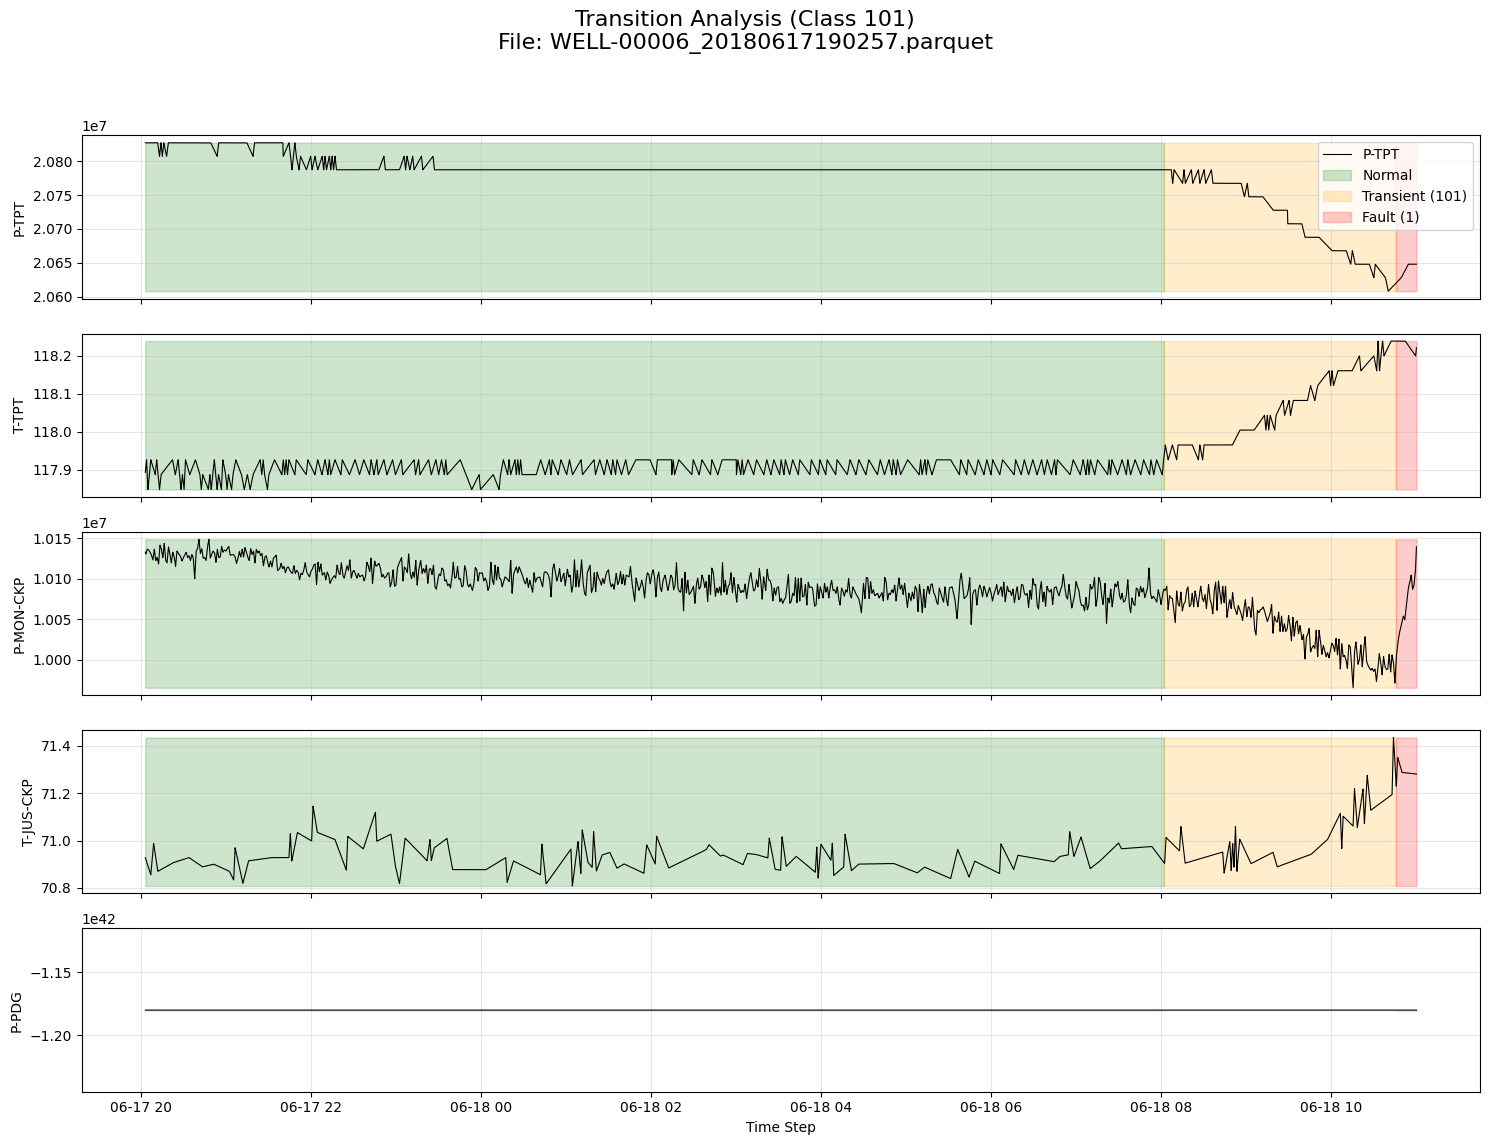

In [ ]:
""" This code displays the behavior of the five sensors 
from the beginning when they are in their normal state (represented in green) 
until they begin to malfunction (represented in orange)
 through the malfunction and stabilization phase (represented in red)."""

import pandas as pd
import matplotlib.pyplot as plt
import os

file_path = '/kaggle/working/3w_dataset_cleaned/1/WELL-00006_20180617190257.parquet' 

#---------- clean the code of any null values ​​to display correct statistics -------------------
df = pd.read_parquet(file_path)
df = df.dropna(subset=['class'])
df['class'] = df['class'].astype(int)
# ---------------------------------------------------------------------------------------------

df = df.sort_index()

sensors_to_plot = ['P-TPT', 'T-TPT', 'P-MON-CKP','T-JUS-CKP','P-PDG']

fig, axes = plt.subplots(len(sensors_to_plot), 1, figsize=(15, 12), sharex=True)
fig.suptitle(f'Transition Analysis (Class 101)\nFile: {os.path.basename(file_path)}', fontsize=16)

for i, sensor in enumerate(sensors_to_plot):
    ax = axes[i]
    ax.plot(df.index, df[sensor], label=sensor, color='black', linewidth=0.8)
    ax.set_ylabel(sensor)
    ax.grid(True, alpha=0.3)

    unique_classes = df['class'].unique()
    for cls in unique_classes:
        color = 'green' if cls == 0 else ('orange' if cls == 101 else 'red')
        label_text = 'Normal' if cls == 0 else ('Transient (101)' if cls == 101 else 'Fault (1)')
        
        mask = df['class'] == cls
        ax.fill_between(df.index, df[sensor].min(), df[sensor].max(), 
                        where=mask, color=color, alpha=0.2, 
                        label=label_text if i == 0 else "")

handles, labels = axes[0].get_legend_handles_labels()
by_label = dict(zip(labels, handles))
axes[0].legend(by_label.values(), by_label.keys(), loc='upper right')

plt.xlabel('Time Step')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Visualization Phase

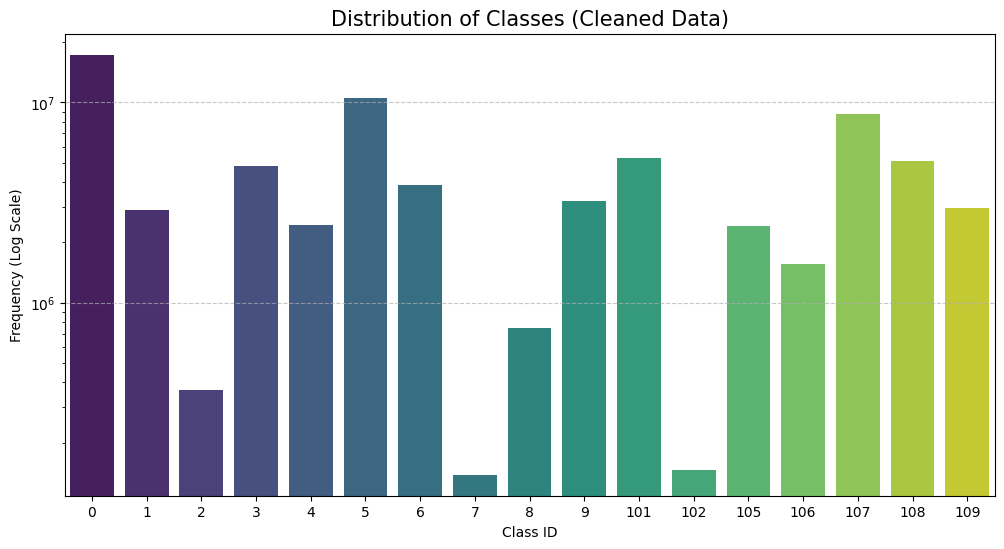

In [ ]:
# ============ This code reads class labels from all parquet files and plots the class distribution using a log-scale count chart====================

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import glob

files = glob.glob('3w_dataset_cleaned/**/*.parquet', recursive=True)
classes = [pd.read_parquet(f, columns=['class'])['class'] for f in files]
all_classes = pd.concat(classes)

plt.figure(figsize=(12, 6))
sns.countplot(x=all_classes, palette='viridis')
plt.title('Distribution of Classes (Cleaned Data)', fontsize=15)
plt.xlabel('Class ID')
plt.ylabel('Frequency (Log Scale)')
plt.yscale('log') 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

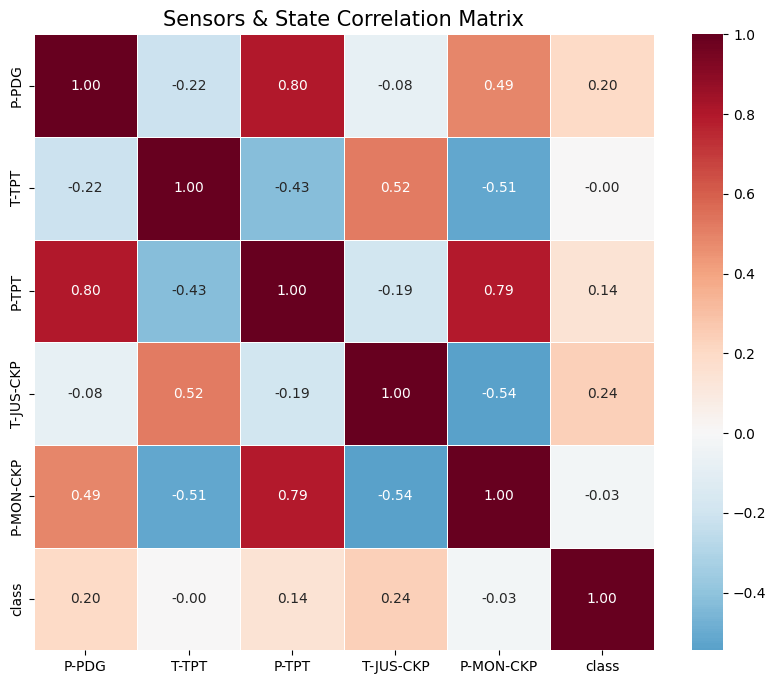

In [ ]:
# ===================This code loads a sample of parquet files, calculates feature correlations, and displays them as a heatmap ==================

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import glob

files = glob.glob('3w_dataset_cleaned/**/*.parquet', recursive=True)[:500]
df_sample = pd.concat([pd.read_parquet(f) for f in files], ignore_index=True)

plt.figure(figsize=(10, 8))
corr = df_sample.corr()
sns.heatmap(corr, annot=True, cmap='RdBu_r', center=0, fmt='.2f', linewidths=0.5)
plt.title('Sensors & State Correlation Matrix', fontsize=15)
plt.show()

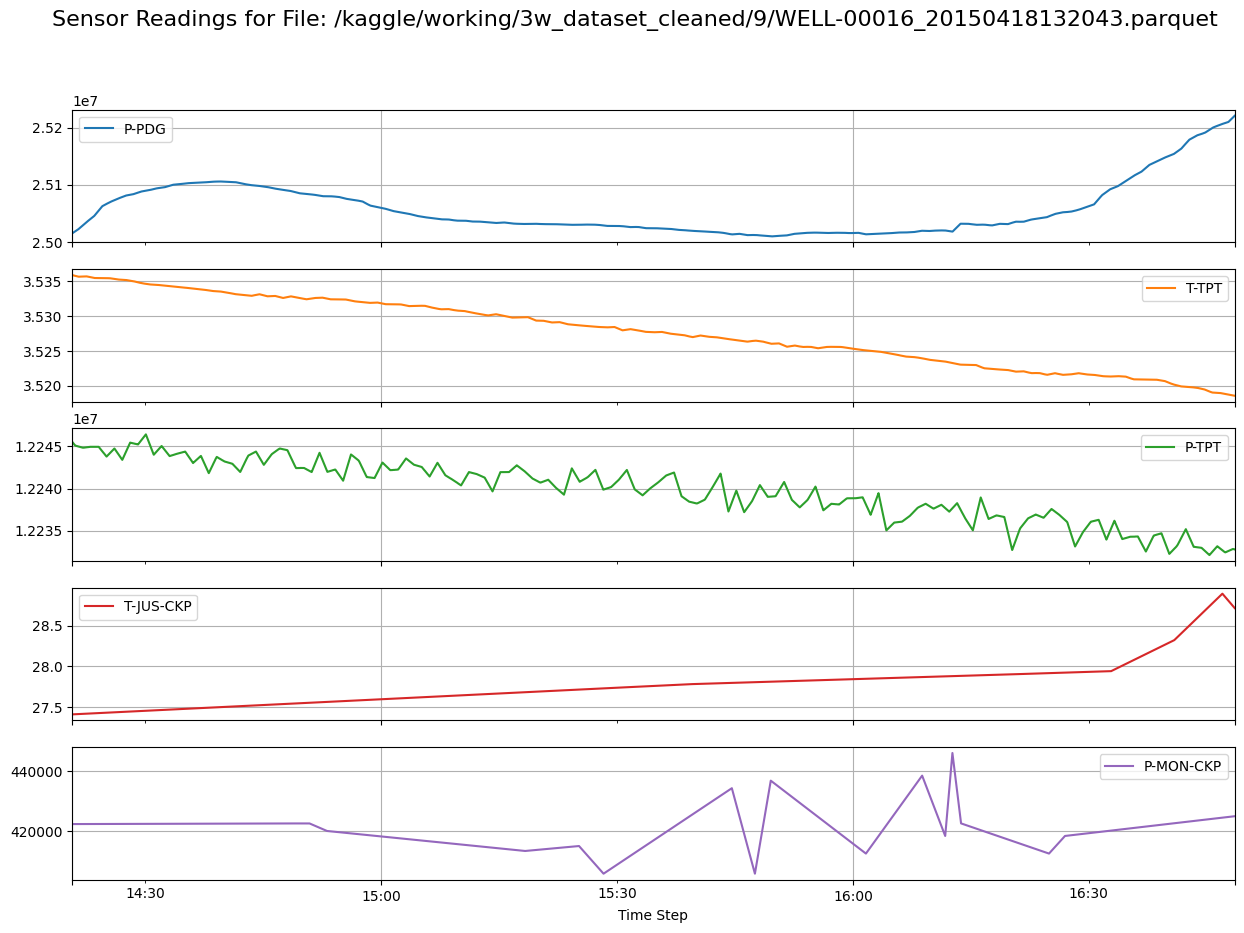

In [ ]:
# ===================Showing the behavior of the five sensors during holiday No 9 ==============
import pandas as pd
import matplotlib.pyplot as plt

sample_file = '/kaggle/working/3w_dataset_cleaned/9/WELL-00016_20150418132043.parquet'
df = pd.read_parquet(sample_file)

cols_to_plot = [c for c in df.columns if c not in ['class', 'state']]
df[cols_to_plot].plot(subplots=True, figsize=(15, 10), sharex=True, grid=True)
plt.suptitle(f'Sensor Readings for File: {sample_file}', fontsize=16)
plt.xlabel('Time Step')
plt.show()

# Merging data 

In [ ]:
"""
This code reads selected sensor columns from all cleaned parquet files, 
merges them into one dataset, removes missing values, and saves the final merged file.
"""

import pandas as pd
import glob
import os

parent_folder = '/kaggle/working/3w_dataset_cleaned'  
sensor_cols = ['P-PDG', 'T-TPT', 'P-TPT', 'T-JUS-CKP', 'P-MON-CKP', 'class']

all_files = glob.glob(os.path.join(parent_folder, '**/*.parquet'), recursive=True)

final_dfs = []
print(f"Starting merge of {len(all_files)} files...")

for i, file_path in enumerate(all_files):
    try:
        df = pd.read_parquet(file_path, columns=sensor_cols)
        final_dfs.append(df)
        
        if (i + 1) % 500 == 0:
            print(f"Merged {i + 1} files...")
    except Exception as e:
        print(f"Error reading file {file_path}: {e}")

print("Concatenating all data into a single file...")
full_dataset = pd.concat(final_dfs, ignore_index=True)

full_dataset = full_dataset.dropna()

full_dataset.to_parquet('Full_Merged_Dataset.parquet')
print(f"Saved successfully. Final dataset shape: {full_dataset.shape}")


Starting merge of 2228 files...
Merged 500 files...
Merged 1000 files...
Merged 1500 files...
Merged 2000 files...
Concatenating all data into a single file...
Saved successfully. Final dataset shape: (51345991, 6)


# Stratified Sampling ( 500K row)


In [ ]:
"""
This code creates a balanced sampled dataset by taking equal rows from each class, 
shuffles the data, 
and saves it for training.
"""

import pandas as pd

print("Reading the merged dataset to extract a sample...")
df_full = pd.read_parquet('Full_Merged_Dataset.parquet')

target_sample_size = 500000
n_classes = df_full['class'].nunique()
rows_per_class = target_sample_size // n_classes

def balanced_sample(group):
    return group.sample(n=min(len(group), rows_per_class), random_state=42)

print(f"Balancing classes (target rows per class: {rows_per_class})...")
df_balanced = df_full.groupby('class', group_keys=False).apply(balanced_sample)

df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

df_balanced.to_parquet('Final_Balanced_Sample_500k.parquet')
df_balanced.to_csv('Final_Balanced_Sample_500k.csv', index=False)

print(f"Final sample prepared with total rows: {len(df_balanced)}")
print("\n--- Class distribution in the new sample ---")
print(df_balanced['class'].value_counts())


Reading the merged dataset to extract a sample...
Balancing classes (target rows per class: 29411)...
Final sample prepared with total rows: 443645

--- Class distribution in the new sample ---
class
0      29411
4      29411
101    29411
102    29411
109    29411
3      29411
5      29411
108    29411
105    29411
8      29411
7      29411
2      29411
107    29411
9      29411
1      29411
106     1902
6        578
Name: count, dtype: int64


In [ ]:
# =======================Show Sample from data===============================
import pandas as pd

file_path = "/kaggle/working/Final_Balanced_Sample_500k.parquet"

df = pd.read_parquet(file_path)
df.head()

,P-PDG,T-TPT,P-TPT,T-JUS-CKP,P-MON-CKP,class
0,0.000000e+00,105.951300,8.979256e+06,55.086520,3.917717e+06,0
1,0.000000e+00,106.563300,1.618657e+07,70.140440,8.494000e+06,4
2,2.027480e+07,95.239952,1.230258e+07,75.444036,2.089152e+06,101
3,3.863401e+07,15.273849,9.213050e+06,85.329098,4.003604e+06,102
4,1.640136e+07,91.252602,7.608092e+06,73.597995,1.102863e+06,109
